# Walmart sales analysis

Walmart is one of the largest retailers in the world, with a presence in 27 countries and over 11,000 stores worldwide. Founded in 1962 by Sam Walton, the company has grown from a single store in Arkansas to a global retail giant with annual revenues of over $500 billion.

Walmart is known for its low prices and wide range of products, including groceries, clothing, electronics, and home goods. The company has a strong focus on innovation and has invested heavily in technology, e-commerce, and supply chain management to stay competitive in the rapidly changing retail landscape.

Despite its size and success, Walmart faces numerous challenges, including increased competition from online retailers, changing consumer preferences, and pressure to improve sustainability and social responsibility practices. As a result, it is essential for Walmart to continually analyze its sales data to identify trends, opportunities, and areas for improvement.



In [3]:
#importing necessary libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [5]:
# importing csv

In [6]:
walmart= pd.read_csv("Walmart.csv")

In [7]:
walmart.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2013-152156,09-11-2013,12-11-2013,Claire Gute,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,CA-2013-152156,09-11-2013,12-11-2013,Claire Gute,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
2,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,US-2012-108966,11-10-2012,18-10-2012,Sean O'Donnell,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,US-2012-108966,11-10-2012,18-10-2012,Sean O'Donnell,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164


In [8]:
walmart.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9995.000000,9994.000000,9995.000000,9995.000000,9995.000000
mean,55194.124962,229.876989,3.789395,0.156207,28.655969
std,32064.275786,623.243084,2.225070,0.206442,234.248406
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.729500
50%,56560.000000,54.490000,3.000000,0.200000,8.671000
75%,90008.000000,209.962500,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


- A product was sold at a significant discount, resulting in negative profit.
- The largest sale was for $22,638.
- The majority of customers bought three products at once.
- The greatest discount offered was 80%.




In [9]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9996 entries, 0 to 9995
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9995 non-null   object 
 1   Order Date     9995 non-null   object 
 2   Ship Date      9995 non-null   object 
 3   Customer Name  9995 non-null   object 
 4   Country        9995 non-null   object 
 5   City           9995 non-null   object 
 6   State          9995 non-null   object 
 7   Postal Code    9995 non-null   float64
 8   Region         9995 non-null   object 
 9   Category       9995 non-null   object 
 10  Sub-Category   9995 non-null   object 
 11  Product Name   9995 non-null   object 
 12  Sales          9994 non-null   float64
 13  Quantity       9995 non-null   float64
 14  Discount       9995 non-null   float64
 15  Profit         9995 non-null   float64
dtypes: float64(5), object(11)
memory usage: 1.2+ MB


### we are missing one whole row, and a sales value

In [10]:
walmart.isnull().sum()

Order ID         1
Order Date       1
Ship Date        1
Customer Name    1
Country          1
City             1
State            1
Postal Code      1
Region           1
Category         1
Sub-Category     1
Product Name     1
Sales            2
Quantity         1
Discount         1
Profit           1
dtype: int64

# Data cleaning

In [11]:
# dropping rows with all null values

<AxesSubplot: xlabel='Sales', ylabel='Count'>

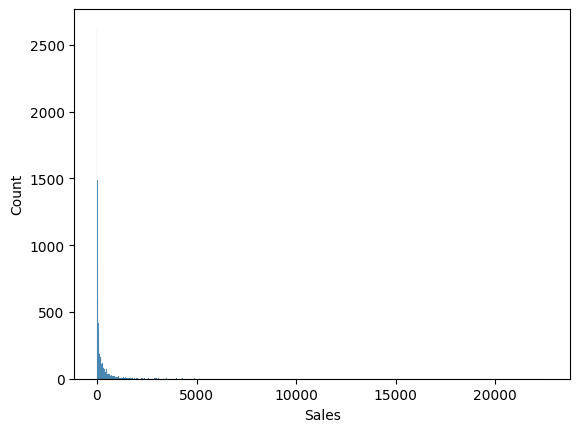

In [12]:
sns.histplot(walmart.Sales)

In [13]:
# the data is very skewed and has wide range, so filling with median is practical

In [14]:

walmart.dropna(how='all',inplace=True)
walmart.Sales.fillna(walmart.Sales.median(), inplace=True)

In [15]:
# Changing formats

In [16]:
walmart['Order Date']= pd.to_datetime(walmart['Order Date'],format='%d-%m-%Y')
walmart['Ship Date']= pd.to_datetime(walmart['Ship Date'],format='%d-%m-%Y')
walmart['Quantity']=walmart['Quantity'].astype('int64')
walmart['Postal Code']=walmart['Postal Code'].astype("object")

In [17]:
walmart.Country.value_counts()

United States    9991
USA                 4
Name: Country, dtype: int64

In [18]:
# there is data inconsistensy, we have to replace it

In [19]:
walmart.Country=walmart.Country.replace({"United States":"USA"})

In [20]:
# extracting month

In [21]:
walmart['month_year'] = walmart['Order Date'].apply(lambda x: x.strftime('%Y-%m'))


In [22]:
# sorting values by month

In [23]:
walmart = walmart.sort_values(by=['month_year'])

### our highest sale

In [24]:
walmart[walmart.Sales==walmart.Sales.max()]

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month_year
2697,CA-2011-145317,2011-03-18,2011-03-23,Sean Miller,USA,Jacksonville,Florida,32216.0,South,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.48,6,0.5,-1811.0784,2011-03


it's better to use the 'pearson' correlation coefficient as the default method, instead of the 'spearman' method, as it's more suitable for linear relationships

In [25]:
walmart.corr(method='pearson')

C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_27408\19285303.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  walmart.corr(method='pearson')


,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200783,-0.028196,0.479065
Quantity,0.200783,1.000000,0.008606,0.066254
Discount,-0.028196,0.008606,1.000000,-0.219488
Profit,0.479065,0.066254,-0.219488,1.000000


### Top 10 frequent buyers

In [26]:
frequent_buyers=walmart['Customer Name'].value_counts()[:10].reset_index()
Total_purchase_by_customers=walmart.groupby('Customer Name')['Sales'].sum().reset_index()
frequent_buyers=frequent_buyers.rename(columns={'index':'Customer Name','Customer Name': 'NO of purchase'})

In [27]:
pd.merge(frequent_buyers,Total_purchase_by_customers,on='Customer Name')

,Customer Name,NO of purchase,Sales
0,William Brown,37,6160.1020
1,John Lee,34,9799.9230
2,Matt Abelman,34,4299.1610
3,Paul Prost,34,7252.6080
4,Edward Hooks,32,10310.8800
5,Chloris Kastensmidt,32,3154.8550
6,Jonathan Doherty,32,7610.8640
7,Seth Vernon,32,11470.9500
8,Zuschuss Carroll,31,8025.7070
9,Emily Phan,31,5478.0608


# feature engineering

In [28]:
# we use  .transform() because we are adding a column, so have to aggregate each row

In [29]:
walmart['revenue_by_subcategory']=walmart.groupby('Sub-Category')['Sales'].transform('sum')

In [30]:
walmart['revenue_product']=walmart.groupby('Product Name')['Sales'].transform('sum')

In [31]:
walmart['Average_sales_by_customer']=walmart.groupby('Customer Name')['Sales'].transform('mean')

In [32]:
walmart['profit_margin'] = (walmart['Profit'] / walmart['Sales']) * 100


In [33]:

walmart['sales_by_state']=walmart.groupby('State')['Sales'].transform('sum')
walmart['sales_by_city']=walmart.groupby('City')['Sales'].transform('sum')

In [34]:
walmart['month_year'] = pd.to_datetime(walmart['month_year'], format='%Y-%m')
walmart['month_year'] = walmart['month_year'].dt.strftime('%m-%Y')
walmart['revenue_by_month']=walmart.groupby('month_year')['Sales'].transform('sum')
walmart['revenue_per_quantity'] = walmart['revenue_product'] / walmart['Quantity']
walmart['shipping_time']=walmart['Ship Date']-walmart['Order Date']

#### creating categories

In [35]:
def type_order(quantity):
    if quantity >= 5:
        return 'bulk order'
    if quantity == 1:
        return 'single ordr'
    if quantity < 5:
        return 'medium order'

walmart['type_order']=walmart['Quantity'].apply(type_order)
def get_sale(sale):
    q=np.quantile(walmart['Sales'],[0.25,0.50,0.75,0.90])
    if sale >= q[3]:
        return 'very high value'
    if sale>= q[2]:
        return 'high value'
    if sale>= q[1]:
        return 'medium value'
    if sale>= q[0]:
        return 'low value'
    else:
        return 'very low value'

walmart['sale_value']=walmart['Sales'].apply(get_sale)
    

In [36]:
sales_by_category = walmart.groupby('Category')['Sales'].agg(['sum', 'count','max']).reset_index()
sales_by_category


,Category,sum,count,max
0,Furniture,741999.7953,2121,4416.174
1,Office Supplies,719032.7120,6026,9892.740
2,Technology,836412.6090,1848,22638.480


In [37]:
# Technoology has highest sale

In [38]:
walmart.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Customer Name', 'Country',
       'City', 'State', 'Postal Code', 'Region', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'month_year',
       'revenue_by_subcategory', 'revenue_product',
       'Average_sales_by_customer', 'profit_margin', 'sales_by_state',
       'sales_by_city', 'revenue_by_month', 'revenue_per_quantity',
       'shipping_time', 'type_order', 'sale_value'],
      dtype='object')

# DATA VISUALIZATION

<AxesSubplot: xlabel='Sales', ylabel='Count'>

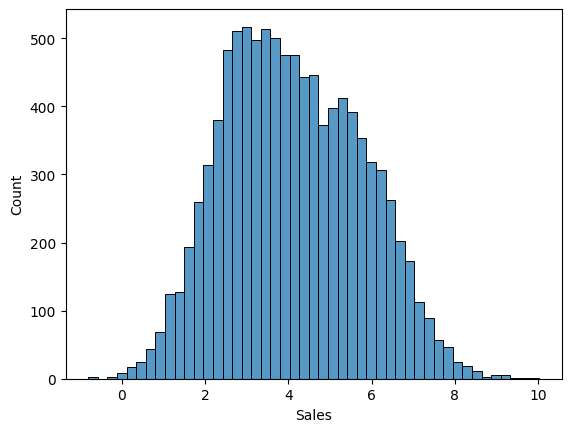

In [39]:
sns.histplot(np.log(walmart['Sales']))


In [40]:
# the data is normally distributed after normalization

<AxesSubplot: xlabel='Category', ylabel='Profit'>

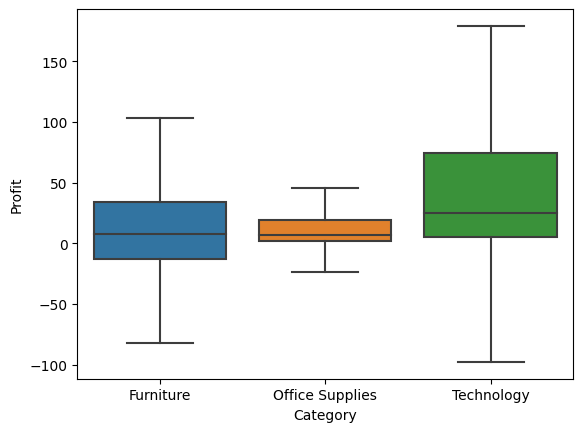

In [41]:
sns.boxplot(y=walmart['Profit'],x=walmart.Category,sym='')


- The technology has wide range of profit and loss
- office supplies profit range is minimal

In [42]:
# hypothesis testing

In [43]:
weekday_sales= walmart[walmart['Order Date'].dt.weekday < 5]['Sales']
weekend_sales= walmart[walmart['Order Date'].dt.weekday < 5]['Sales']

t_stat, p_value=stats.ttest_ind(weekday_sales, weekend_sales, equal_var=False)
print('t-statistic: ', t_stat)
print('p-value: ', p_value)

t-statistic:  0.0
p-value:  1.0


In [44]:
high_value=['high value','very high value']
high_value_products=walmart[walmart['sale_value'].isin(high_value) ]
discounted_sale = high_value_products[high_value_products['Discount'] > 0]['Sales']
non_discounted_sale = high_value_products[high_value_products['Discount'] == 0]['Sales']


In [48]:
t_stat, p_value = stats.mannwhitneyu(discounted_sale,non_discounted_sale,alternative='less')


print('t:',t_stat)
print('p:',p_value)

t: 747118.0
p: 0.13586179842324336


In [47]:
t_stat, p_value=stats.f_oneway(walmart['Sales'][walmart['Category']=='Furniture'],walmart['Sales'][walmart['Category']=='Office Supplies'],walmart['Sales'][walmart['Category']=='Technology'])
print('t-statistic: ', t_stat)
print('p-value: ', p_value)

t-statistic:  265.46785981171223
p-value:  4.6502619433122117e-113


- we cannot conclude that offering a weekdat sales or discount significantly affects the sale value of high value products at Walmart.
- but for The category The t-statistic of 265.47 indicates that the difference between the means of the groups is quite large relative to the variability within the groups.

- The p-value of 4.65e-113 is very small, indicating a very high level of statistical significance. This means that the probability of obtaining such a large difference between the means by chance alone is extremely small, assuming that the assumptions of the ANOVA test have been met.

- Overall, the results suggest that there is a significant difference in mean sales between the three product categories in the "walmart" dataset.




In [50]:
cat_sum=walmart.groupby('Category')['Sales'].sum().reset_index()
cat_profit=walmart.groupby('Category')['Profit'].sum().reset_index()

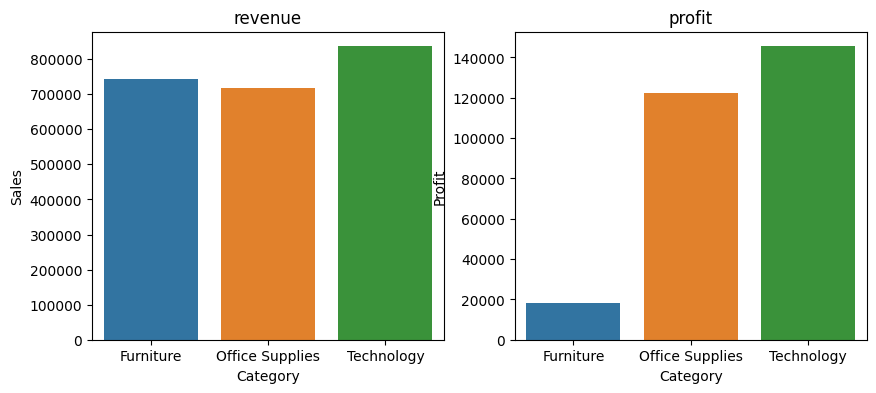

In [51]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=[10,4])
ax1.set_title('revenue')
sns.barplot(y=cat_sum.Sales,x=cat_sum.Category,ax=ax1)
ax2.set_title('profit')
sns.barplot(y=cat_profit.Profit,x=cat_profit.Category,ax=ax2)
plt.show()

In [52]:
# Technology category has the highest sale and highest profit
# furnitures was sold on very low profit 
# so reevaluate the pricing strategy or the cost structure of the product to ensure sustainable profitability in the long term. 

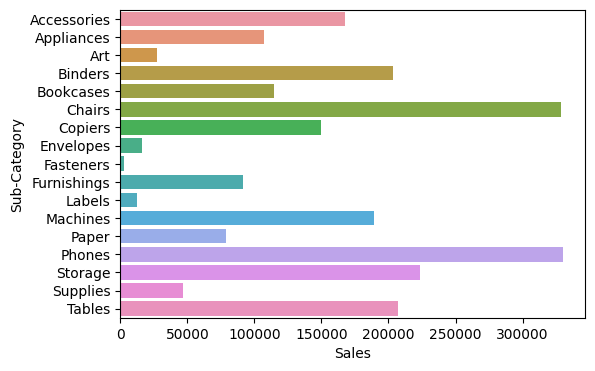

In [53]:
sub_revenue=walmart.groupby('Sub-Category')['Sales'].sum().reset_index()
plt.figure(figsize=[6,4])
sns.barplot(x='Sales',y='Sub-Category',data=sub_revenue,errorbar=None)

plt.show()

In [54]:
# phones has highest revenue next it was chairs(surprisingly) 
#  fasteners has the least

<AxesSubplot: xlabel='Sales', ylabel='Profit'>

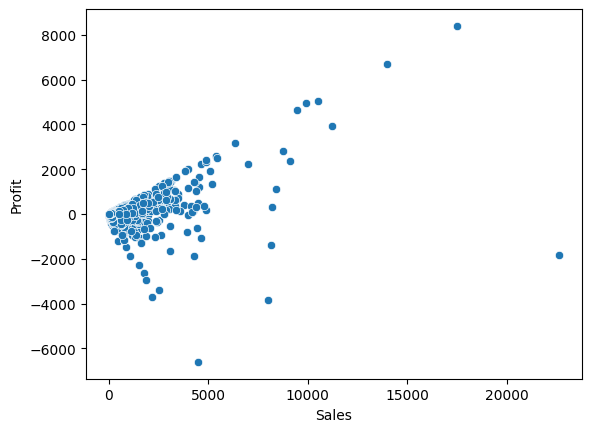

In [55]:
sns.scatterplot(x='Sales',y='Profit',data=walmart)

### sales by month

C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_18172\4189962980.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_trend= walmart.groupby('month_year').sum()['Sales'].reset_index()


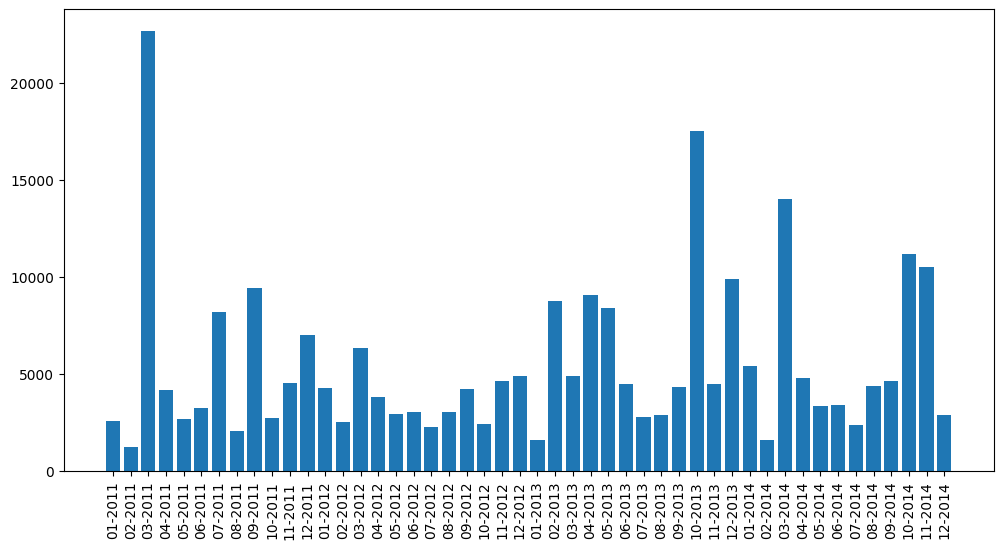

In [56]:
monthly_trend= walmart.groupby('month_year').sum()['Sales'].reset_index()
plt.figure(figsize=(12,6))
plt.bar(walmart['month_year'],walmart['Sales'])
plt.xticks(rotation=90)
plt.show()

In [57]:
# highest sales was on march 2011
# this is because 6 Cisco TelePresence System was sold worth 22638.48$, which was our highest sale

<AxesSubplot: xlabel='month_year', ylabel='Sales'>

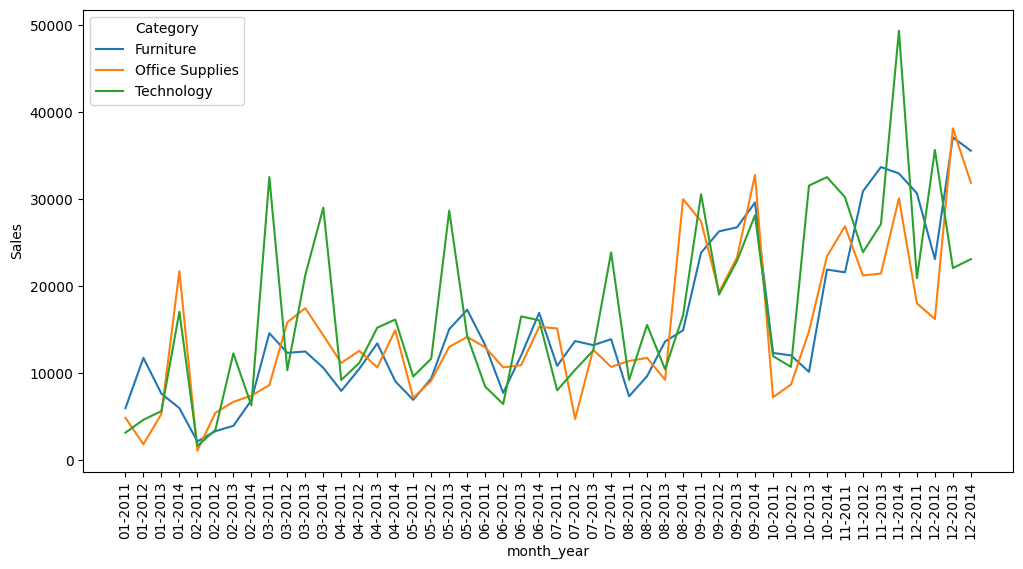

In [58]:

month_rev=walmart.groupby(['month_year','Category'])['Sales'].sum().reset_index()
plt.figure(figsize=[12,6])
plt.xticks(rotation=90)
sns.lineplot(x='month_year',y='Sales',hue='Category',data=month_rev)

In [59]:
# hopefully revenue is increasing month by month

### Geographic analysis

<function matplotlib.pyplot.show(close=None, block=None)>

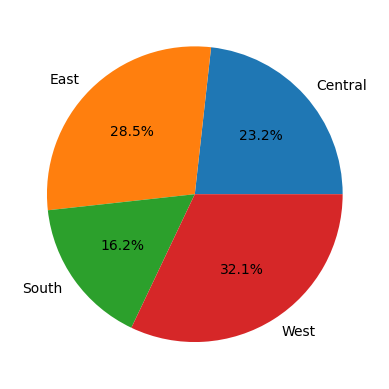

In [60]:
Regional_dist=walmart.groupby('Region')['Order ID'].count().reset_index()
plt.pie(Regional_dist['Order ID'],labels=Regional_dist.Region,autopct='%1.1f%%')
plt.show

In [61]:
# west has the highest orders.

<function matplotlib.pyplot.show(close=None, block=None)>

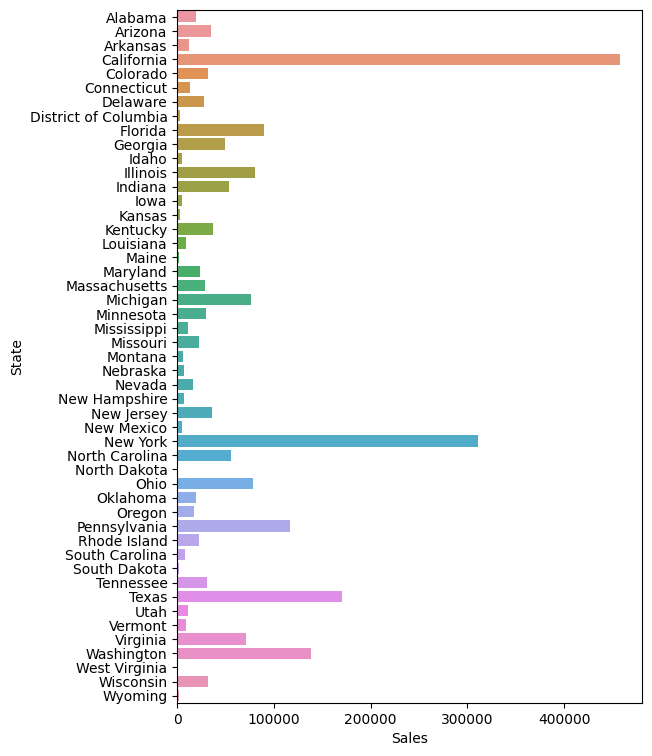

In [62]:
dist_state=walmart.groupby('State')['Sales'].sum().reset_index()
plt.figure(figsize=[6,9])
sns.barplot(x=dist_state['Sales'],y=dist_state.State)
plt.show

In [63]:
# CALIFORNIA has the highest revenue


## predictive analysis

In [64]:
#time for sales prediction


In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [66]:
# to avoid over fitting, chosse features accordingly

In [67]:
X=walmart[['Quantity','profit_margin','revenue_by_subcategory','revenue_product','Average_sales_by_customer','revenue_by_month']]

In [68]:
y=walmart.Sales

In [69]:
# I have already tried linear regression in this analysis,
# but it got a very low score, so im showing only the random forest Regressor.

In [70]:
clf=RandomForestRegressor()

In [71]:
# splitting train test

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [73]:
clf.fit(X_train,y_train)

RandomForestRegressor()

In [74]:

y_pred=clf.predict(X_test)


In [75]:
# lets check the scores

In [ ]:
clf.score(X_test,y_test)

0.8541342442174076

In [ ]:
print("MAE:",MAE(y_test,y_pred))
print("MSE:",MSE(y_test,y_pred))
print("RMSE:",np.sqrt(MSE(y_test,y_pred)))
print("R2:",r2_score(y_test,y_pred)) 

MAE: 76.58998170837529
MSE: 54599.445236033105
RMSE: 233.66524182264058
R2: 0.8541342442174076


 the MAE of 76.59 means that on average, the sales predictions made by the model have an error of $76.59 in comparison to the actual sales values. The MSE of 54599.44 indicates that the model's predictions have a higher error for larger sales values, and the RMSE of 233.67 is the square root of the MSE, which represents the average difference between the predicted and actual sales values in dollars.

The R2 value of 0.854 suggests that the model explains 85.4% of the variation in the sales data, which is a good performance for a predictive model. It indicates that the model can account for a substantial amount of the variability in the sales data and is making reasonably accurate predictions.